In [11]:
""" Import Statements """

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

def euclidean_d(p1, p2):
    d = np.sqrt(np.sum(p1-p2)**2)
    return d

def euclidean_d_scipy(p1, p2):
    d = distance.euclidean(p1, p2)
    return d     

def manhattan_d(p1, p2): 
    sum = 0
    n = len(p1)  
    # for each point, finding distance 
    # to rest of the point 
    for i in range(n): 
        for j in range(i+1,n): 
            sum += (abs(p1[i] - p1[j]) +
                        abs(p2[i] - p2[j])) 
      
    return sum

In [12]:
class K_Nearest_Neigh:
    # Create a constructor method, where we pass a value for k. We will assign the default value to 5.
    def __init__(self, k=5):
        self.k = k
   
   # Create fit method and pass training data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # Create predict method 
    def predict(self, X):
        predicted_classes = [self.predict_per_sample(x) for x in X]
        return np.array(predicted_classes)
        
    # Create a helper method, where we pass each sample value
    def predict_per_sample(self, x):
        # Find the distances between the target and X_train values
        distances = [euclidean_d(x, x_train) for x_train in self.X_train]
        # Find the k-nearest neighbors samples 
        k_indices = np.argsort(distances)[0:self.k] # will sort the distances and return the indices
        # Find the k-nearest neighbors labels 
        kn_class = [self.y_train[i] for i in k_indices]
        # Find the most common class, which new data will be assigned to 
        most_common_class = Counter(kn_class).most_common(1) 
        return most_common_class[0][0]
    

In [13]:
# Load data
income_df = pd.read_csv('income.csv')
# Convert to binary classification 
income_df['Income'] = income_df['Income'].replace({' >50K':1,' <=50K':0}) 
income_df.head()

,Age,Education,Edu_num,Occupation,Race,Gender,Hours_per_week,Country,Income
0,50,Bachelors,13,Exec-managerial,White,Male,13,United-States,0
1,38,HS-grad,9,Handlers-cleaners,White,Male,40,United-States,0
2,53,11th,7,Handlers-cleaners,Black,Male,40,United-States,0
3,28,Bachelors,13,Prof-specialty,Black,Female,40,Cuba,0
4,37,Masters,14,Exec-managerial,White,Female,40,United-States,0


In [14]:
# Split data into training and testing
train, test = train_test_split(income_df, train_size=0.80, test_size=0.20, 
                              stratify=income_df['Income'], random_state=42)

# Print shape of training and testing data
train.shape, test.shape

((26048, 9), (6512, 9))

In [15]:
# Arrange data into X features matrix and y target vector 
target = 'Income'
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

# Transform the categorical variables
encoder = ce.ordinal.OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

X_train_enc.head(3)

,Age,Education,Edu_num,Occupation,Race,Gender,Hours_per_week,Country
15737,32,1,13,1,1,1,45,1
3526,24,2,9,2,1,1,40,1
30412,45,3,10,3,1,1,40,1


In [16]:
# Normalize the data
# Convert data into numpy array
X_train_enc = np.array(X_train_enc)
X_test_enc = np.array(X_test_enc)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_enc)
X_test = scaler.transform(X_test_enc)
y_train = np.array(y_train)
y_train = np.array(y_train)

X_train

array([[-0.48483403, -0.83917527,  1.13176799, ..., -0.70438032,
         0.36638869, -0.27187883],
       [-1.07206349, -0.57051046, -0.41986719, ..., -0.70438032,
        -0.03866069, -0.27187883],
       [ 0.46941385, -0.30184566, -0.0319584 , ..., -0.70438032,
        -0.03866069, -0.27187883],
       ...,
       [-1.43908191, -0.57051046, -0.41986719, ...,  1.41968759,
         0.12335906, -0.27187883],
       [-0.85185244, -0.03318085, -3.13522876, ..., -0.70438032,
        -0.03866069,  1.17410768],
       [ 0.32260648, -0.57051046, -0.41986719, ..., -0.70438032,
        -0.03866069, -0.27187883]])

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26048, 8), (26048,), (6512, 8), (6512,))

In [17]:
# Create an object neigh for our algorithm K_Nearest_Neigh 
neigh = K_Nearest_Neigh(k=5)
# Fit and predict data 
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
print(pred)
acc_score = np.sum(pred == y_test) / len(y_test)
print(f'Accuracy score using KNN algorithm: {acc_score}')

[0 0 0 ... 0 0 0]
Accuracy score using KNN algorithm: 0.7248157248157249


In [18]:
print('KNN using Scikit-Learn library: /n')
               
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

print(neigh.predict(X_test))

print(neigh.predict_proba(X_test))
accuracy_score = neigh.score(X_test, y_test)

print(f'Accuracy score using Scikit Learn KNN algorithm: {accuracy_score}')

KNN using Scikit-Learn library: /n
[0 0 0 ... 0 0 0]
[[0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 ...
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]]
Accuracy score using Scikit Learn KNN algorithm: 0.7954545454545454


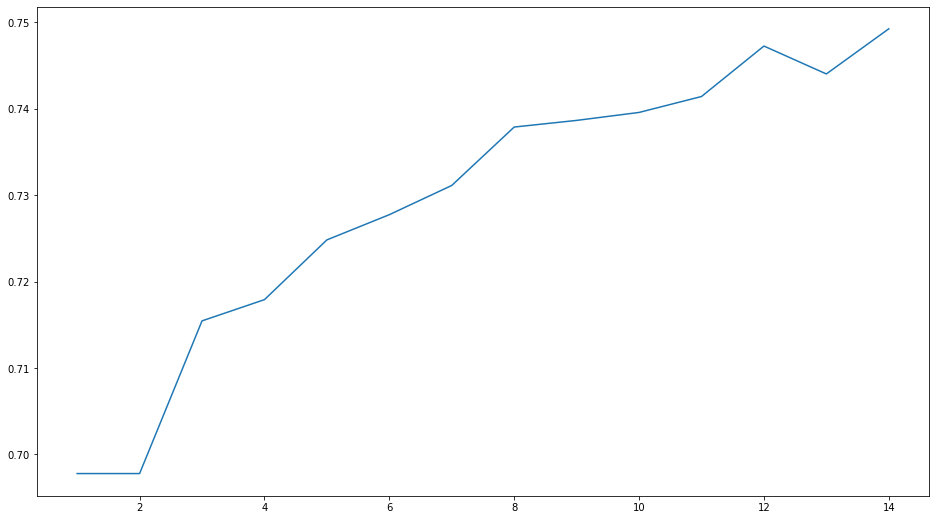

In [27]:
# We take a range of values for K(1 to 15) and find the accuracy 
# so that we can visualize how accuracy changes based on value of K
accuracy = []
for n in range(1,15):
    neigh = K_Nearest_Neigh(k=n)
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    acc_score = np.sum(y_pred == y_test) / len(y_test)
    accuracy.append(acc_score)
## Plotting the accuracies for different values of K
plt.figure(figsize=(16,9))
plt.plot(range(1,15),accuracy)